In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import string

In [2]:
disney = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

In [3]:
disney

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
disney = disney.drop_duplicates()

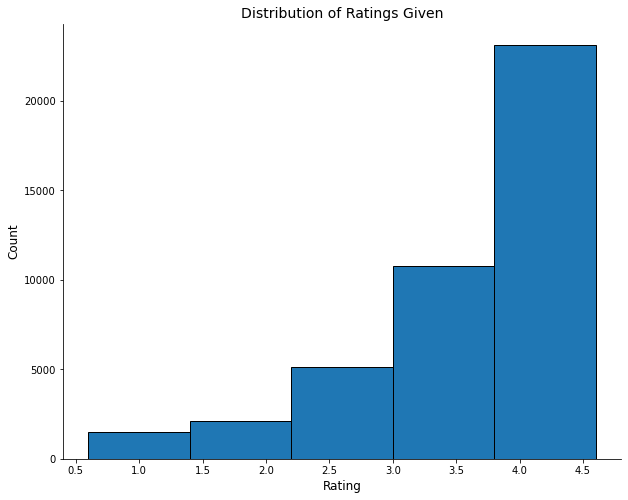

In [5]:
plt.figure(figsize=(10,8))
plt.hist(disney.Rating, align='left', bins=5, edgecolor='k')
sns.despine()
plt.title('Distribution of Ratings Given', fontsize=14)
plt.xlabel('Rating', fontsize=12), plt.ylabel('Count', fontsize=12)
plt.show()

In [6]:
ca = disney[disney.Branch=='Disneyland_California']
paris = disney[disney.Branch=='Disneyland_Paris']
hk = disney[disney.Branch=='Disneyland_HongKong']

In [7]:
print('California average rating is ' + str(ca.Rating.mean()))
print('Paris average rating is ' + str(paris.Rating.mean()))
print('Hong Kong average rating is ' + str(hk.Rating.mean()))

California average rating is 4.405328798185941
Paris average rating is 3.9600117396727565
Hong Kong average rating is 4.204141088336281


In [8]:
date = disney.Year_Month.str.split('-', n = 1, expand = True)
disney['Year'] = date[0]
disney['Month'] = date[1]

<ipython-input-8-7e128e0b0504>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['Year'] = date[0]
<ipython-input-8-7e128e0b0504>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['Month'] = date[1]


In [9]:
bydate=disney.copy()
bydate = bydate[bydate.Year != 'missing']

In [10]:
bydate['Date'] = bydate.Month.astype(str) + '-' + bydate.Year.astype(str)
bydate.Date = pd.to_datetime(bydate.Date)
bydate.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

In [11]:
bydate

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Date
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019-04-01
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019-05-01
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019-04-01
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019-04-01
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019-04-01
...,...,...,...,...,...,...
42113,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,2011-01-01
42114,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,2011-01-01
42115,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,2010-12-01
42116,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,2010-12-01


In [12]:
bydate = bydate.groupby(['Date']).mean()
bydate = bydate.reset_index()

In [13]:
bydate

,Date,Review_ID,Rating
0,2010-03-01,9.509587e+07,4.500000
1,2010-04-01,9.763760e+07,5.000000
2,2010-05-01,9.900311e+07,3.250000
3,2010-06-01,1.014696e+08,4.250000
4,2010-07-01,1.095932e+08,4.142857
...,...,...,...
106,2019-01-01,6.482398e+08,4.151659
107,2019-02-01,6.544722e+08,4.231214
108,2019-03-01,6.610946e+08,4.013761
109,2019-04-01,6.673314e+08,4.071429


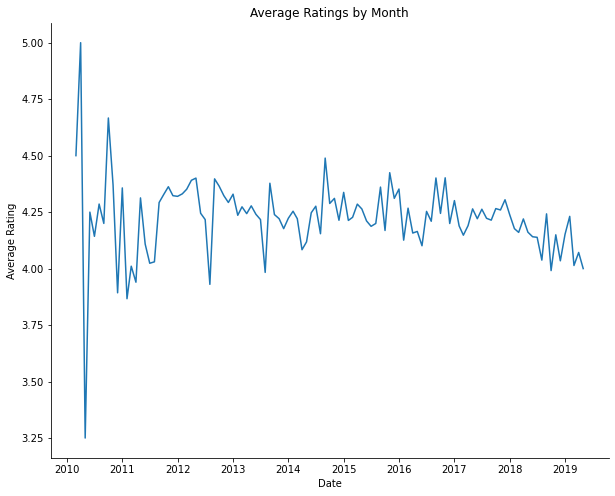

In [14]:
plt.figure(figsize=(10,8))
plt.plot(bydate.Date, bydate.Rating)
sns.despine()
plt.title('Average Ratings by Month')
plt.xlabel('Date'), plt.ylabel('Average Rating')
plt.show()

In [15]:
uno = disney[disney.Rating==1]
uno = uno[uno.Year != 'missing']

dos = disney[disney.Rating==2]
dos = dos[dos.Year != 'missing']

tres = disney[disney.Rating==3]
tres = tres[tres.Year != 'missing']

quatro = disney[disney.Rating==4]
quatro = quatro[quatro.Year != 'missing']

cinco = disney[disney.Rating==5]
cinco = cinco[cinco.Year != 'missing']

In [16]:
uno['Date'] = uno.Month.astype(str) + '-' + uno.Year.astype(str)
uno.Date = pd.to_datetime(uno.Date)
uno.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

dos['Date'] = dos.Month.astype(str) + '-' + dos.Year.astype(str)
dos.Date = pd.to_datetime(dos.Date)
dos.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

tres['Date'] = tres.Month.astype(str) + '-' + tres.Year.astype(str)
tres.Date = pd.to_datetime(tres.Date)
tres.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

quatro['Date'] = quatro.Month.astype(str) + '-' + quatro.Year.astype(str)
quatro.Date = pd.to_datetime(quatro.Date)
quatro.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

cinco['Date'] = cinco.Month.astype(str) + '-' + cinco.Year.astype(str)
cinco.Date = pd.to_datetime(cinco.Date)
cinco.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

In [17]:
uno = uno.resample(rule='1Y', on='Date').count()

In [18]:
uno

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Date
Date,,,,,,
2010-12-31,10,10,10,10,10,10
2011-12-31,77,77,77,77,77,77
2012-12-31,106,106,106,106,106,106
2013-12-31,163,163,163,163,163,163
2014-12-31,165,165,165,165,165,165
2015-12-31,198,198,198,198,198,198
2016-12-31,191,191,191,191,191,191
2017-12-31,187,187,187,187,187,187
2018-12-31,193,193,193,193,193,193


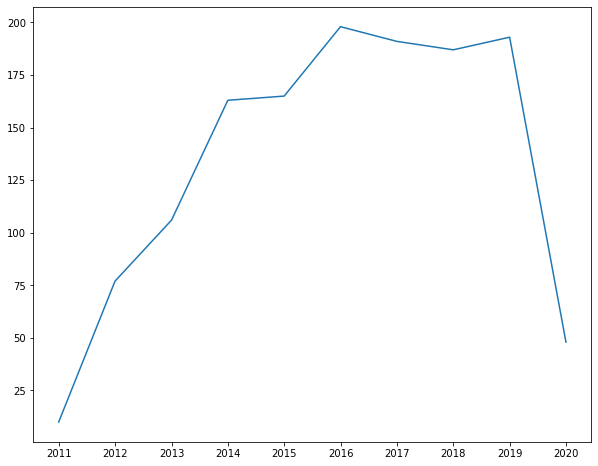

In [19]:
plt.figure(figsize=(10,8))
plt.plot(uno.index, uno.Rating)
plt.show()

In [20]:
disney.isnull().sum()

Review_ID               0
Rating                  0
Year_Month              0
Reviewer_Location       0
Review_Text             0
Branch                  0
Year                    0
Month                2613
dtype: int64

In [21]:
disney.Year_Month.value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-7        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

In [22]:
def polar(x):
    return TextBlob(x).sentiment.polarity

In [23]:
disney['sentiment'] = disney.Review_Text.apply(polar)

<ipython-input-23-7fb28641117e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['sentiment'] = disney.Review_Text.apply(polar)


In [24]:
disney

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,0.243981
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,0.236131
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,0.160498
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,0.189286
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,0.266667
...,...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,missing,None,0.252273
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,missing,None,0.179250
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,missing,None,0.153205
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,missing,None,0.265327


In [25]:
five = disney[disney.Rating == 5]
four = disney[disney.Rating == 4]
three = disney[disney.Rating == 3]
two = disney[disney.Rating == 2]
one = disney[disney.Rating == 1]

In [26]:
print('The mean sentiment of 5-star ratings is: ' + str(five.sentiment.mean()))
print('The mean sentiment of 4-star ratings is: ' + str(four.sentiment.mean()))
print('The mean sentiment of 3-star ratings is: ' + str(three.sentiment.mean()))
print('The mean sentiment of 2-star ratings is: ' + str(two.sentiment.mean()))
print('The mean sentiment of 1-star ratings is: ' + str(one.sentiment.mean()))

The mean sentiment of 5-star ratings is: 0.2793843433629878
The mean sentiment of 4-star ratings is: 0.2008760939277914
The mean sentiment of 3-star ratings is: 0.10657674530634487
The mean sentiment of 2-star ratings is: 0.04185154879077969
The mean sentiment of 1-star ratings is: -0.002582081265210947


In [27]:
len(five)+len(four)+len(three)+len(two)


41145

In [28]:
sentisort = disney.sort_values(by= ['sentiment'], ascending=False)

In [29]:
sentisort = sentisort.reset_index()
sentisort = sentisort.drop(['index'], axis=1)
sentisort

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,sentiment
0,107432003,5,2010-11,United States,My family and I had a blast at Disneyland!!!!!...,Disneyland_California,2010,11,1.000000
1,201292518,4,2014-4,United Kingdom,"I was blown away by Disneyland, the shows, the...",Disneyland_Paris,2014,4,1.000000
2,134538402,5,2012-7,United States,Cast members need to remember that you are vis...,Disneyland_California,2012,7,1.000000
3,219106833,5,2013-9,United States,"The Disneyland Park, events, shows, shopping, ...",Disneyland_California,2013,9,1.000000
4,435765063,5,2016-10,Singapore,Disneyland is very awesome! It made me felt li...,Disneyland_HongKong,2016,10,1.000000
...,...,...,...,...,...,...,...,...,...
42639,375367784,2,2016-5,Belgium,We use to go every year to Disneyland Paris. ...,Disneyland_Paris,2016,5,-0.976562
42640,272736099,3,2014-6,United Kingdom,I have been to Disney Florida 6 times and the ...,Disneyland_California,2014,6,-1.000000
42641,603914623,4,2018-7,Israel,"Been to one, been to all... Get's a bit boring...",Disneyland_California,2018,7,-1.000000
42642,5192240,1,missing,United States,HK disney is boring go ocean park go la disn...,Disneyland_HongKong,missing,None,-1.000000


In [30]:
fives = sentisort[sentisort.sentiment > 0.191111111110]
fives['Prediction'] = 5

<ipython-input-30-51880b6f6f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fives['Prediction'] = 5


In [31]:
sentisort.sentiment[23146]

0.1910416666666667

In [32]:
sentisort.sentiment[33921]

0.08333333333333333

In [33]:
fours = sentisort[sentisort.sentiment > 0.0833333333332]
fours = fours[fours.sentiment < 0.191111111111111]
fours['Prediction'] = 4

In [34]:
fours

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,sentiment,Prediction
23138,212904543,5,2013-12,United States,"It's the original, and it's enchanting.Went in...",Disneyland_California,2013,12,0.191108,4
23139,514591000,5,2016-10,Australia,"We've been here twice now, and we're already p...",Disneyland_California,2016,10,0.191103,4
23140,356342415,5,2016-2,United States,There is just no other place like it. Super cl...,Disneyland_California,2016,2,0.191087,4
23141,333392217,4,2015-12,Indonesia,Love to play here.Lots of theme park here.Lots...,Disneyland_HongKong,2015,12,0.191071,4
23142,282983663,2,2015-6,United States,"Disney has great customer service, great attra...",Disneyland_California,2015,6,0.191071,4
...,...,...,...,...,...,...,...,...,...,...
33933,122326526,5,2011-11,United States,"How could we not love every moment, the whole ...",Disneyland_California,2011,11,0.083333,4
33934,381557007,4,2016-6,United Kingdom,"Well, it's Disney, so always going to be amazi...",Disneyland_Paris,2016,6,0.083333,4
33935,331283259,3,2015-11,United States,We usually go to Disney in Florida so we're sp...,Disneyland_HongKong,2015,11,0.083333,4
33936,262812270,4,2015-3,Australia,We visited on a Monday and avoided the crowd o...,Disneyland_HongKong,2015,3,0.083333,4


In [35]:
sentisort.sentiment[41157]

-0.09375

In [36]:
threes = sentisort[sentisort.sentiment > -0.004933333333333339]
threes = threes[threes.sentiment < 0.0833333333332]
threes['Prediction'] = 3

In [37]:
twos = sentisort[sentisort.sentiment > -0.09285714285714286]
twos = twos[twos.sentiment < -0.004933333333333336]
twos['Prediction'] = 2

In [38]:
ones = sentisort[sentisort.sentiment < -0.09285714285714286]
ones['Prediction'] = 1

<ipython-input-38-ce91b07bac37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['Prediction'] = 1


In [39]:
combined = pd.concat([fives, fours, threes, twos, ones])

In [40]:
combined

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month,sentiment,Prediction
0,107432003,5,2010-11,United States,My family and I had a blast at Disneyland!!!!!...,Disneyland_California,2010,11,1.000000,5
1,201292518,4,2014-4,United Kingdom,"I was blown away by Disneyland, the shows, the...",Disneyland_Paris,2014,4,1.000000,5
2,134538402,5,2012-7,United States,Cast members need to remember that you are vis...,Disneyland_California,2012,7,1.000000,5
3,219106833,5,2013-9,United States,"The Disneyland Park, events, shows, shopping, ...",Disneyland_California,2013,9,1.000000,5
4,435765063,5,2016-10,Singapore,Disneyland is very awesome! It made me felt li...,Disneyland_HongKong,2016,10,1.000000,5
...,...,...,...,...,...,...,...,...,...,...
42639,375367784,2,2016-5,Belgium,We use to go every year to Disneyland Paris. ...,Disneyland_Paris,2016,5,-0.976562,1
42640,272736099,3,2014-6,United Kingdom,I have been to Disney Florida 6 times and the ...,Disneyland_California,2014,6,-1.000000,1
42641,603914623,4,2018-7,Israel,"Been to one, been to all... Get's a bit boring...",Disneyland_California,2018,7,-1.000000,1
42642,5192240,1,missing,United States,HK disney is boring go ocean park go la disn...,Disneyland_HongKong,missing,None,-1.000000,1


In [41]:
matrix = confusion_matrix(combined.Rating, combined.Prediction)
dataframe = pd.DataFrame(matrix, columns=[1,2,3,4,5], index=[1,2,3,4,5])

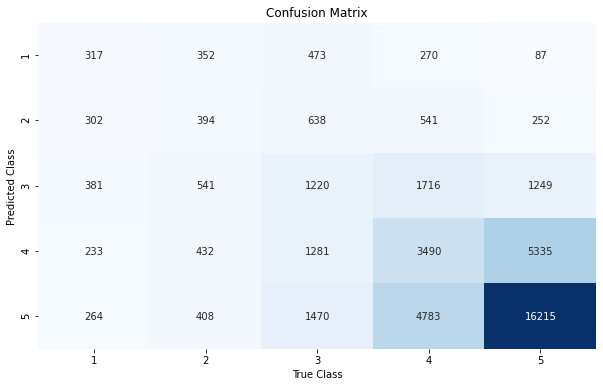

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Predicted Class')
plt.xlabel('True Class')
plt.show()

In [43]:
print(classification_report(combined.Rating, combined.Prediction))

              precision    recall  f1-score   support

           1       0.21      0.21      0.21      1499
           2       0.19      0.19      0.19      2127
           3       0.24      0.24      0.24      5107
           4       0.32      0.32      0.32     10771
           5       0.70      0.70      0.70     23140

    accuracy                           0.51     42644
   macro avg       0.33      0.33      0.33     42644
weighted avg       0.51      0.51      0.51     42644



In [44]:
df = combined.copy()

In [45]:
df.replace({'Rating': {5:'4 or More', 4:'4 or More', 3:'3 or Less', 2:'3 or Less', 1:'3 or Less'}}, inplace=True)
df.replace({'Prediction': {5:'4 or More', 4:'4 or More', 3:'3 or Less', 2:'3 or Less', 1:'3 or Less'}}, inplace=True)

In [46]:
matrix2 = confusion_matrix(df.Rating, df.Prediction)
dataframe2 = pd.DataFrame(matrix2, columns=['3 or Less','4 or More'], index=['3 or Less','4 or More'])

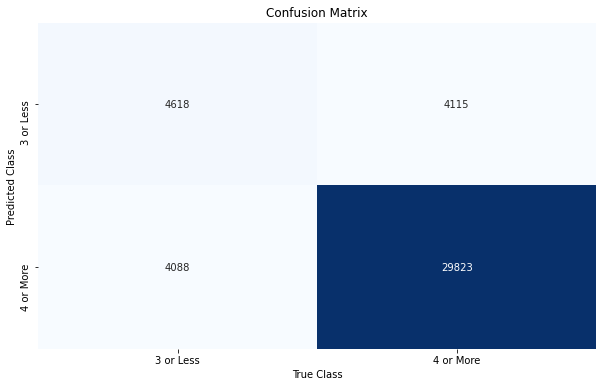

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe2, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Predicted Class')
plt.xlabel('True Class')
plt.show()

In [48]:
print(classification_report(df.Rating, df.Prediction))

              precision    recall  f1-score   support

   3 or Less       0.53      0.53      0.53      8733
   4 or More       0.88      0.88      0.88     33911

    accuracy                           0.81     42644
   macro avg       0.70      0.70      0.70     42644
weighted avg       0.81      0.81      0.81     42644



In [52]:
def text_clean(Review_Text):
    nopunc = [i for i in Review_Text if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]

In [53]:
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))
])
X1 = disney.Review_Text
y1 = disney.Rating
review_train1, review_test1, rating_train1, rating_test1 = train_test_split(X1, y1, test_size=0.3, random_state=23)
pipeline.fit(review_train1, rating_train1)
pip_pred1 = pipeline.predict(review_test1)
print(classification_report(rating_test1,pip_pred1))

              precision    recall  f1-score   support

           1       0.58      0.22      0.32       474
           2       0.37      0.14      0.20       652
           3       0.40      0.32      0.35      1515
           4       0.44      0.33      0.38      3257
           5       0.70      0.89      0.79      6896

    accuracy                           0.62     12794
   macro avg       0.50      0.38      0.41     12794
weighted avg       0.58      0.62      0.58     12794



In [54]:
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', MultinomialNB())
])
X2 = disney.Review_Text
y2 = disney.Rating
review_train2, review_test2, rating_train2, rating_test2 = train_test_split(X2, y2, test_size=0.5)
pipeline.fit(review_train2, rating_train2)
pip_pred2 = pipeline.predict(review_test2)
print(classification_report(rating_test2, pip_pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       773
           2       0.00      0.00      0.00      1107
           3       0.00      0.00      0.00      2516
           4       0.00      0.00      0.00      5377
           5       0.54      1.00      0.70     11549

    accuracy                           0.54     21322
   macro avg       0.11      0.20      0.14     21322
weighted avg       0.29      0.54      0.38     21322



C:\Users\David\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', DecisionTreeClassifier())
])
X3 = disney.Review_Text
y3 = disney.Rating
review_train3, review_test3, label_train3, label_test3 = train_test_split(X3, y3, test_size=0.5)
pipeline.fit(review_train3, label_train3)
pip_pred3 = pipeline.predict(review_test3)
print(classification_report(label_test3, pip_pred3))

              precision    recall  f1-score   support

           1       0.19      0.15      0.16       733
           2       0.14      0.12      0.13      1073
           3       0.20      0.18      0.19      2610
           4       0.29      0.28      0.29      5408
           5       0.63      0.68      0.66     11498

    accuracy                           0.47     21322
   macro avg       0.29      0.28      0.28     21322
weighted avg       0.45      0.47      0.46     21322



In [56]:
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', RandomForestClassifier())
])
X4 = disney.Review_Text
y4 = disney.Rating
review_train4, review_test4, label_train4, label_test4 = train_test_split(X4, y4, test_size=0.5)
pipeline.fit(review_train4, label_train4)
pip_pred4 = pipeline.predict(review_test4)
print(classification_report(label_test4, pip_pred4))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00       741
           2       0.67      0.00      0.00      1076
           3       0.35      0.01      0.02      2531
           4       0.26      0.04      0.07      5396
           5       0.56      0.99      0.72     11578

    accuracy                           0.55     21322
   macro avg       0.57      0.21      0.16     21322
weighted avg       0.48      0.55      0.41     21322

